# IMAGE SEGEMNTATION AND COMPRESSION
----

#### Importing libraries
----

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import cv2
%matplotlib inline

#### Generating data from sample image
----

In [2]:
img = cv2.imread('sample.png')

In [31]:
img_shape = img.shape
img_shape

(200, 181, 3)

In [4]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  #changing bgr to rgb

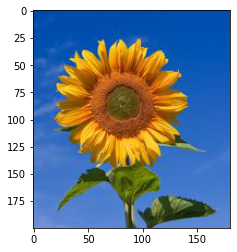

In [6]:
plt.imshow(img)     #original image

In [7]:
type(img)

numpy.ndarray

#### Reshaping the data and converting it into pandas dataframe with columns r, g and b
----

In [9]:
img = img.reshape((-1, 3))
img = img.astype(np.float64)
img

array([[  1.,  71., 167.],
       [  1.,  71., 167.],
       [  1.,  71., 167.],
       ...,
       [ 94., 137., 215.],
       [ 94., 137., 215.],
       [ 94., 137., 215.]])

In [10]:
df = pd.DataFrame(data = img, columns = ['r', 'g', 'b'])
df.head()

,r,g,b
0,1.0,71.0,167.0
1,1.0,71.0,167.0
2,1.0,71.0,167.0
3,1.0,71.0,167.0
4,1.0,71.0,167.0


#### Predicting label 
----

In [11]:
def PREDICT_LABEL(means, x, y, z):     
    k = len(means)
    dist = np.zeros(k)

    for i in range(k):
        val = (means[i][0] - x)**2 + (means[i][1] - y)**2 + (means[i][2] - z)**2
        dist[i] = val
    
    return np.argmin(dist)

#### Assigning label
----

In [12]:
def ASSIGN_LABELS(means):
    df['label'] = df.apply(lambda row: PREDICT_LABEL(means, row['r'], row['g'], row['b']), axis = 1)

#### Calculating Means
----

In [13]:
def CALCULATE_MEAN(k):
    counts = dict()

    for i in range(k):
        counts[i] = [0.0, 0.0, 0.0, 0.0]

    for i in range(len(df)):
        row = df.iloc[i]
        label = np.int(row['label'])

        counts[label][0] += row['r']
        counts[label][1] += row['g']
        counts[label][2] += row['b']
        counts[label][3] += 1
    means = np.zeros((k, 3))
    for i in range(k):
        count = np.float64(counts[i][3])
        if count == 0.0:
            count += 1
        means[i] = (counts[i][0] / count, counts[i][1] / count, counts[i][2] / count)
    return means

#### Cost function
----

In [14]:
def compute_cost(means):
    j = 0.0
    
    for i in range(len(df)):
        row = df.iloc[i]
        idx = np.int(row['label'])
        val = (means[idx][0] - row['r'])**2 + (means[idx][1] - row['g'])**2 + (means[idx][2] - row['b'])**2
        j += np.sqrt(val)
    
    return j

#### To compare the previous and new value of means
----

In [15]:
def compare(means, new_means):
    diff = np.sum(means - new_means)
    threshold = 10**-4
    return (diff <= threshold)

#### K-Means Implementation
----

In [19]:
def K_MEANS(k):
    J_f = float(10**10)
    means_f = np.zeros((k, 3))
    for t in range(4):                      #checking four times so to not stuck in local minima
        sample = df.sample(n = k)
        means = np.zeros((k, 3))

        for i in range(k):
            row = sample.iloc[i]
            means[i] = (np.float64(row['r']), np.float64(row['g']), np.float64(row['b']))
        
        flag = 1
        while flag:
            ASSIGN_LABELS(means)
            new_means = CALCULATE_MEAN(k)

            if(compare(means, new_means)):
                flag = 0
            else:
                means = new_means[:]

        J = compute_cost(means)

        if(int(J*100) < int(J_f*100)):
            J_f = J
            means_f = means
        print("Sample: ", t, "for K-Value:", k, "completed!..........")
    return J_f, means_f

#### Calculating cost and mean for cluster values between 2 and 11
----

In [20]:
costs = []
means_dict = {}

In [21]:
for i in range(2, 11):
    cost_i, means_i = K_MEANS(i)
    means_dict[i] = means_i 
    costs.append(cost_i)

<ipython-input-13-d35e115362a3>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label = np.int(row['label'])
<ipython-input-14-c502a03d3f2c>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more de

Sample:  0 for K-Value: 2 completed!..........
Sample:  1 for K-Value: 2 completed!..........
Sample:  2 for K-Value: 2 completed!..........
Sample:  3 for K-Value: 2 completed!..........
Sample:  0 for K-Value: 3 completed!..........
Sample:  1 for K-Value: 3 completed!..........
Sample:  2 for K-Value: 3 completed!..........
Sample:  3 for K-Value: 3 completed!..........
Sample:  0 for K-Value: 4 completed!..........
Sample:  1 for K-Value: 4 completed!..........
Sample:  2 for K-Value: 4 completed!..........
Sample:  3 for K-Value: 4 completed!..........
Sample:  0 for K-Value: 5 completed!..........
Sample:  1 for K-Value: 5 completed!..........
Sample:  2 for K-Value: 5 completed!..........
Sample:  3 for K-Value: 5 completed!..........
Sample:  0 for K-Value: 6 completed!..........
Sample:  1 for K-Value: 6 completed!..........
Sample:  2 for K-Value: 6 completed!..........
Sample:  3 for K-Value: 6 completed!..........
Sample:  0 for K-Value: 7 completed!..........
Sample:  1 fo

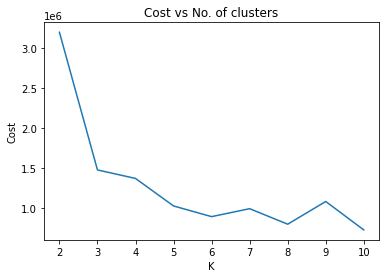

In [22]:
plt.plot(range(2, 11), costs)
plt.xlabel('K')
plt.ylabel('Cost')
plt.title('Cost vs No. of clusters')
plt.show()

#### To get image while using num of clusters between 2 and 11
----

In [43]:
def GET_IMAGE(k):
    means = means_dict[k]
    means = np.round(means)
    means = means.astype(np.int64)
    
    ASSIGN_LABELS(means)
    
    comp_data = np.zeros((len(df), 3))
    for i in range(len(df)):
        row = df.iloc[i]
        idx = np.int(row['label'])
        comp_data[i] = means[idx]
    
    comp_data = comp_data.reshape(img_shape)
    comp_data = comp_data.astype(np.int64)

    plt.imshow(comp_data)
    

### Image with three clusters i.e. three colors only
----

<ipython-input-43-21ed34272f21>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.int(row['label'])


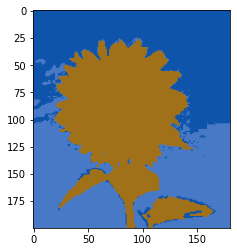

In [44]:
GET_IMAGE(3)

### Image with 6 clusters i.e. 6 colors only
----

<ipython-input-43-21ed34272f21>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.int(row['label'])


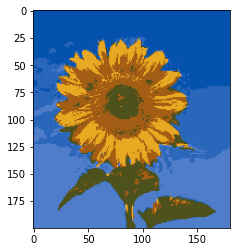

In [45]:
GET_IMAGE(6)

### Image with 10 clusters i.e. 10 colors only
----

<ipython-input-43-21ed34272f21>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  idx = np.int(row['label'])


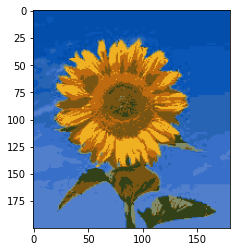

In [46]:
GET_IMAGE(10)

#### By doing image segmentation it is also doing image compression simultaneously, as
- to store all colors,
- we need 8 bit * 3 = 24bit, to represent (r, g, b)
- for N pixels, it results into 24*N
- but now we're using logK bits only to represent k colors, so it totals to
- 24*K (to map k colors with (r, g, b) values) + log2(K) * N 
- which is less than the former

#### For our sample image, there are 200 * 183 pixels
- normally it will be 10,54,080 bits
- but using 10 clusters, it will be 1,21,752 bits
- which is way more lesser than the former one
